In [1]:
import sys
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
sys.path.append('../src/')
from utils import *
from config import *

from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import seaborn as sns
rcParams.update(fig_params)

from scipy import stats as stats
from scipy.stats import rv_continuous, rv_histogram, norm, beta, multivariate_normal
from sklearn.model_selection import train_test_split
from scipy.linalg import block_diag

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
import scipy

%load_ext autoreload
%autoreload 2

In [2]:
N = 1000
ρ = 0.99999
Σ = np.array([[1.0, ρ],  # correlation matrix
              [ρ, 1.0]])
X = multivariate_normal([0]*Σ.shape[0], Σ).rvs(size=N)

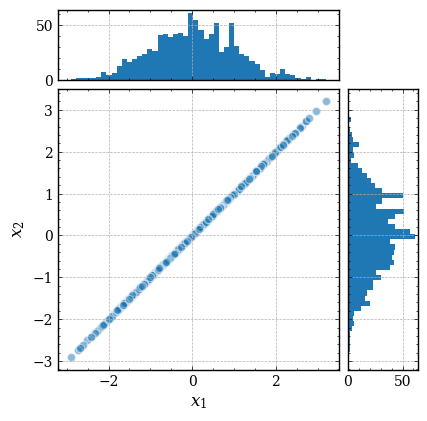

In [3]:
fig = plt.figure(figsize=(4, 4))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4), left=0.1, right=1.0, bottom=0.1, top=1.0, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax.scatter(X[:,0], X[:,1], alpha=0.5, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histx.hist(X[:,0], bins=50)
ax_histy.hist(X[:,1], bins=50, orientation='horizontal')
plt.show()

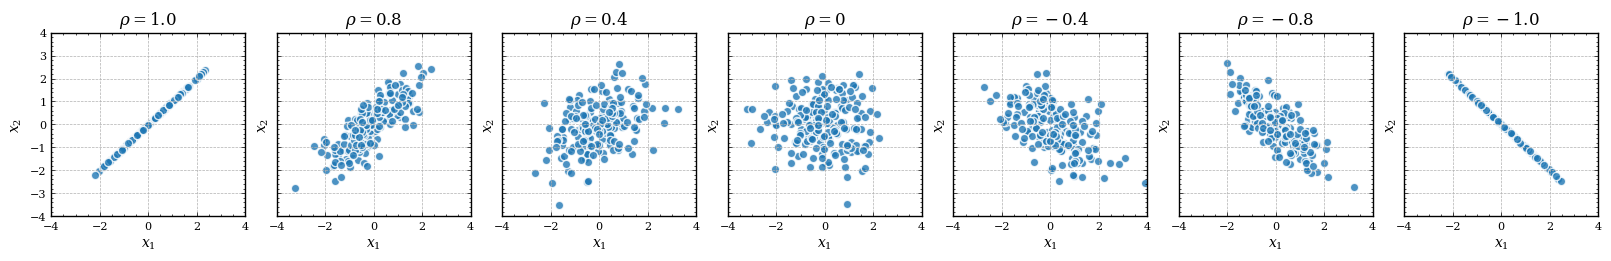

In [4]:
N = 200
ρ_list = [1-1e-6, 0.8, 0.4, 0, -0.4, -0.8, -1 + 1e-6]

fig_params.update({'figure.figsize': [16, 2.5], 'axes.labelsize': 10, 'xtick.labelsize': 8, 'ytick.labelsize': 8,})
rcParams.update(fig_params)
fig, axes = plt.subplots(ncols=7, nrows=1, constrained_layout=True, sharex=True, sharey=True)
#axes = axes.reshape(3*2)

for i,ρ in enumerate(ρ_list):
    Σ = np.array([[1.0, ρ],  # correlation matrix
                  [ρ, 1.0]])
    X = multivariate_normal([0]*Σ.shape[0], Σ).rvs(size=N)
    axes[i].scatter(X[:,0], X[:,1], alpha=0.8, edgecolors='w')
    axes[i].set_xlabel(r'$x_1$')
    axes[i].set_ylabel(r'$x_2$')
    axes[i].set_xlim(-4,4)
    axes[i].set_ylim(-4,4)
    axes[i].set_title(fr'$\rho={round(ρ,1)}$')
    #axes[i].grid(False)

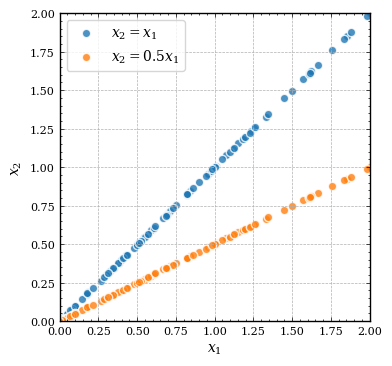

In [5]:
N = 200
ρ = 1-1e-6
Σ = np.array([[1.0, ρ],  # correlation matrix
              [ρ, 1.0]])
X = multivariate_normal([0]*Σ.shape[0], Σ).rvs(size=N)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(X[:,0], X[:,1], alpha=0.8, edgecolors='w', label=r'$x_2 = x_1$')
ax.scatter(X[:,0], 0.5*X[:,1], alpha=0.8, edgecolors='w', label=r'$x_2 = 0.5x_1$')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xlim(0,2.)
ax.set_ylim(0,2.)
ax.legend()

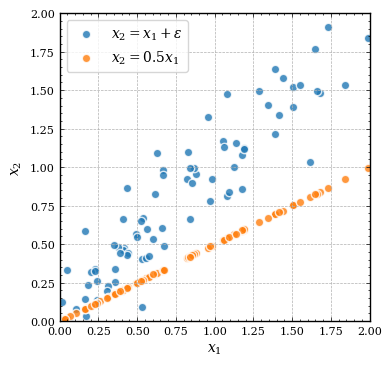

In [6]:
N = 200
ρ = 1-1e-6
Σ = np.array([[1.0, ρ],  # correlation matrix
              [ρ, 1.0]])
X = multivariate_normal([0]*Σ.shape[0], Σ).rvs(size=N)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(X[:,0], X[:,1]+0.2*np.random.randn(N), alpha=0.8, edgecolors='w', label=r'$x_2 = x_1 + \epsilon$')
ax.scatter(X[:,0], 0.5*X[:,1], alpha=0.8, edgecolors='w', label=r'$x_2 = 0.5x_1$')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xlim(0,2.)
ax.set_ylim(0,2.)
ax.legend()

(-4.0, 4.0)

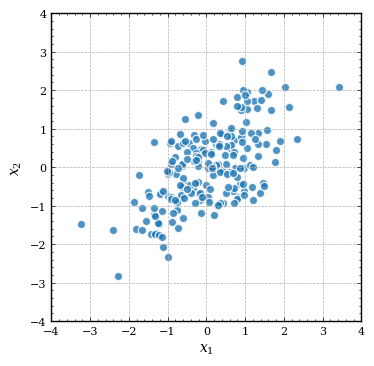

In [7]:
seed_everything(seed=7)

N = 200
ρ = 0.6 # desired linear correlation between x1 and x2 
Σ = np.array([[1.0, ρ],  # correlation matrix
              [ρ, 1.0]])
X = multivariate_normal([0]*Σ.shape[0], Σ).rvs(size=N)
#X = norm.cdf(X)
X1 = X[:,0]
X2 = X[:,1]

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(X1, X2, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

In [8]:
print('Numpy: ', round(np.corrcoef(X1, X2)[0,1], 3))
print('Scipy: ', round(scipy.stats.pearsonr(X1, X2)[0], 3))
print('Pandas: ', round(pd.Series(X1).corr(pd.Series(X2)), 3))

Numpy:  0.625
Scipy:  0.625
Pandas:  0.625


Text(0, 0.5, '$x_2$')

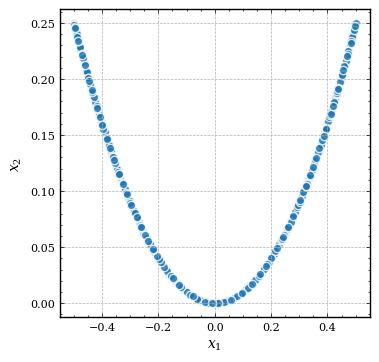

In [9]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N)-0.5
y = x**2

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
#ax.set_xlim(0,2.)
#ax.set_ylim(0,2.)
#ax.legend()

Text(0, 0.5, '$x_2$')

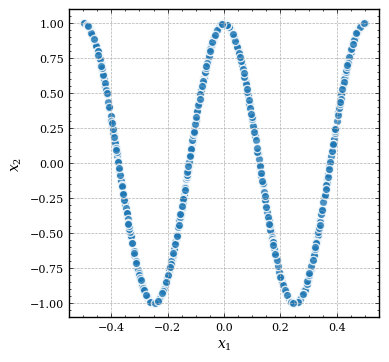

In [10]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N)-0.5
y = np.cos(4*np.pi*x)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

Text(0, 0.5, '$x_2$')

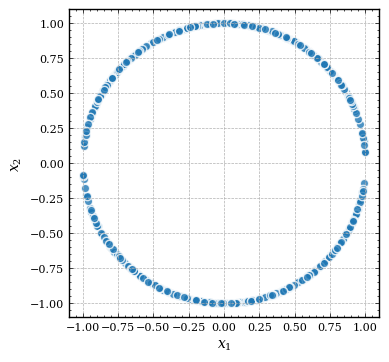

In [11]:
seed_everything(seed=2)

N=1000
x = 2*np.random.rand(N)-1
y = np.sqrt(1-x**2)
idxs = np.random.choice(N, size=N // 2, replace=False)
y[idxs] = -1*y[idxs]

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

Text(0, 0.5, '$x_2$')

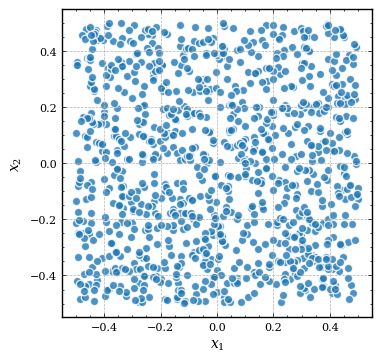

In [12]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N)-0.5
y = np.random.rand(N)-0.5

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

[[ 1.        -0.1634802]
 [-0.1634802  1.       ]]


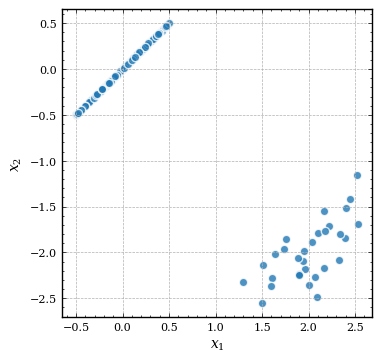

In [13]:
seed_everything(seed=7)

N = 1000
D = 30
x = np.random.rand(N)-0.5
y = np.copy(x)

idxs = np.random.choice(N, size=D, replace=False)
x[idxs] = x[idxs]+ 2 + 0.2*np.random.randn(D)
y[idxs] = y[idxs]- 2 + 0.2*np.random.randn(D)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
print(np.corrcoef(x,y))

[[ 1.         -0.01443931]
 [-0.01443931  1.        ]]


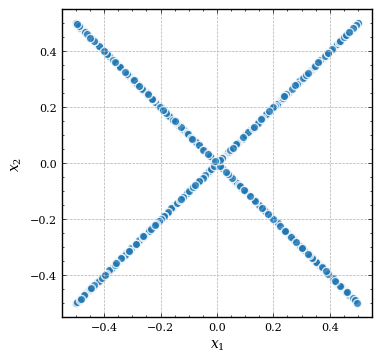

In [14]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N)-0.5
y = np.copy(x)
idxs = np.random.choice(N, size=N // 2, replace=False)
y[idxs] = -1*y[idxs]


fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
print(np.corrcoef(x,y))

[[1.         0.27970477]
 [0.27970477 1.        ]]


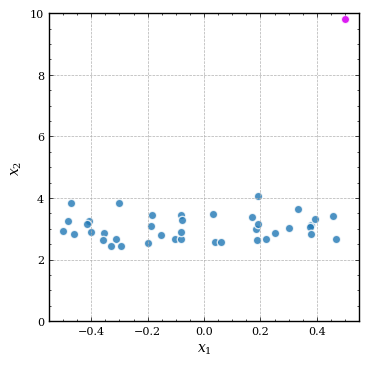

In [15]:
seed_everything(seed=1)

N = 40
x = np.random.rand(N)-0.5
y = 3 + 0.5*np.random.randn(N)

x = np.insert(x, -1, 0.5)
y = np.insert(y, -1, 9.8)

x1 = x
x2 = y


fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.scatter(x[-2], y[-2], alpha=0.8, edgecolors='w', color='magenta')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
#ax.set_xlim(-4,5)
ax.set_ylim(0,10)
print(np.corrcoef(x, y))

In [16]:
N = 100

df = pd.DataFrame({'x1':x1,'x2':x2})
corrs = []

for i in range(N):
    
    df_tmp = df.sample(frac=1, replace=True, random_state=i)
    corrs.append(df_tmp.corr().values[0,1])

(array([ 3.,  2.,  7.,  4.,  5., 15., 24., 17., 17.,  6.]),
 array([-0.18624797, -0.11540187, -0.04455577,  0.02629033,  0.09713643,
         0.16798253,  0.23882863,  0.30967473,  0.38052083,  0.45136693,
         0.52221303]),
 <BarContainer object of 10 artists>)

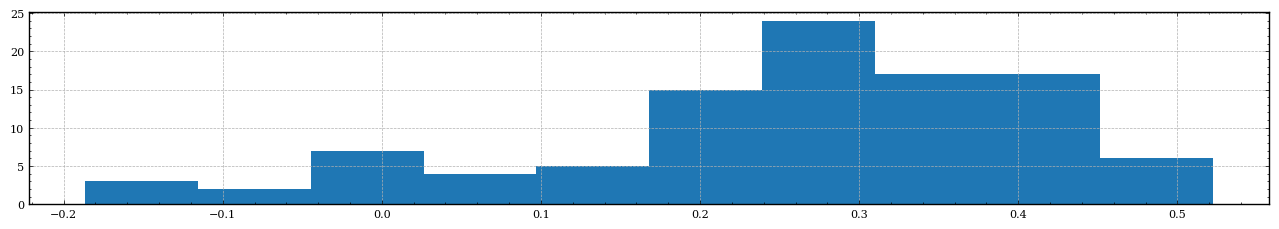

In [17]:
plt.hist(corrs)

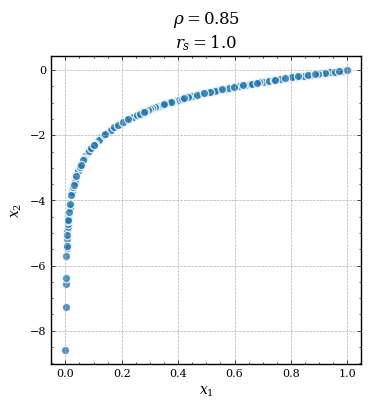

In [18]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N)
y = np.log(x)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x,y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x,y).correlation, 2)}$');

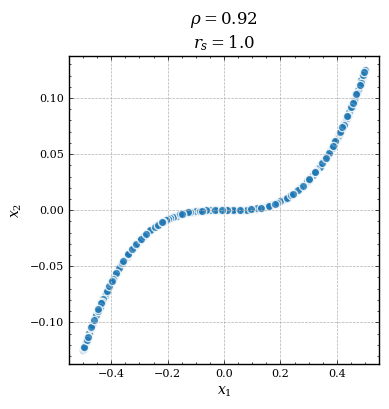

In [19]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N) -0.5
y = x**3

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x,y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x,y).correlation, 2)}$');

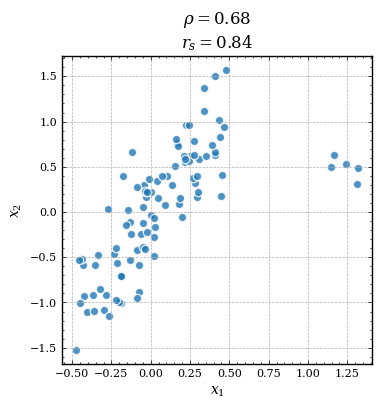

In [42]:
seed_everything(seed=7)

N = 100
D = 5
x = np.random.rand(N) - 0.5
y = 2*x + 0.4*np.random.randn(N)

idxs = np.random.choice(N, size=D, replace=False)
x[idxs] = 1.2 + 0.1*np.random.randn(D)
y[idxs] = 0.5 + 0.1*np.random.randn(D)

X1 = x
X2 = y


fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x,y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x,y).correlation, 2)}$');

In [43]:
print('Scipy: ', round(scipy.stats.spearmanr(X1, X2)[0], 3))
print('Pandas: ', round(pd.Series(X1).corr(pd.Series(X2), method='spearman'), 3))

Scipy:  0.836
Pandas:  0.836


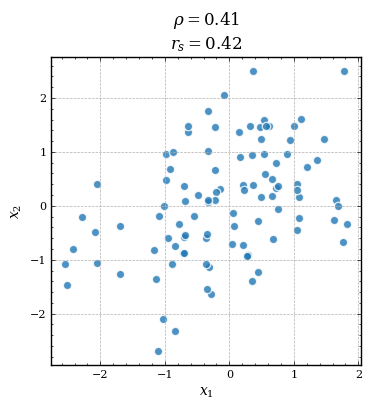

In [21]:
seed_everything(seed=0)

N = 100
ρ = 0.4 # desired linear correlation between x1 and x2 
Σ = np.array([[1.0, ρ],  # correlation matrix
              [ρ, 1.0]])
X = multivariate_normal([0]*Σ.shape[0], Σ).rvs(size=N)
#X = norm.cdf(X)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(X[:,0], X[:,1], alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(X[:,0], X[:,1])[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(X[:,0], X[:,1]).correlation, 2)}$');

## Pearson vs Spearman

[4.24241938]


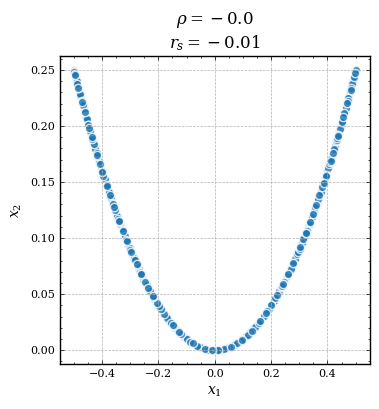

In [22]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N)-0.5
y = x**2

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
#ax.set_xlim(0,2.)
#ax.set_ylim(0,2.)
#ax.legend()
ax.set_title(fr'$\rho={round(np.corrcoef(x, y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x, y).correlation, 2)}$');
print(mutual_info_regression(x.reshape(-1, 1), y))

[3.35077512]


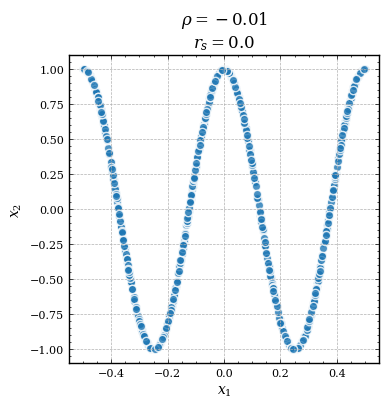

In [23]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N)-0.5
y = np.cos(4*np.pi*x)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x, y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x, y).correlation, 2)}$');
print(mutual_info_regression(x.reshape(-1, 1), y))

[3.32191341]


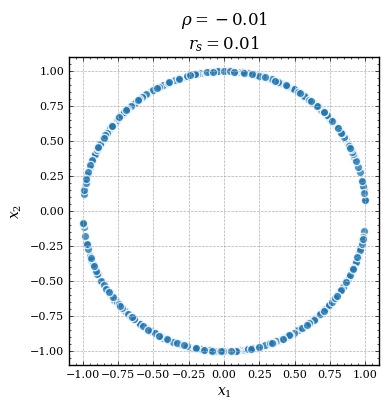

In [24]:
seed_everything(seed=2)

N=1000
x = 2*np.random.rand(N)-1
y = np.sqrt(1-x**2)
idxs = np.random.choice(N, size=N // 2, replace=False)
y[idxs] = -1*y[idxs]

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x, y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x, y).correlation, 2)}$');
print(mutual_info_regression(x.reshape(-1, 1), y))

[4.38327405]


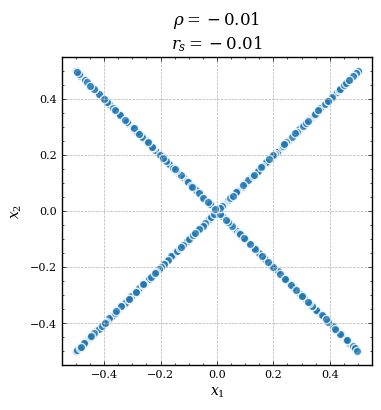

In [25]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N)-0.5
y = np.copy(x)
idxs = np.random.choice(N, size=N // 2, replace=False)
y[idxs] = -1*y[idxs]


fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x, y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x, y).correlation, 2)}$');
print(mutual_info_regression(x.reshape(-1, 1), y))

## ## Pearson vs Spearman vs MI

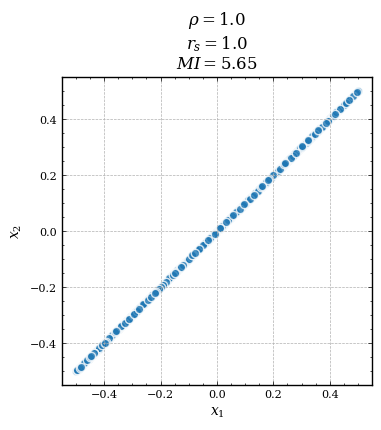

In [31]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N)-0.5
y = np.copy(x)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x, y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x, y).correlation, 2)}$'
            "\n"
            fr'$MI={round(mutual_info_regression(x.reshape(-1, 1), y)[0], 2)}$');

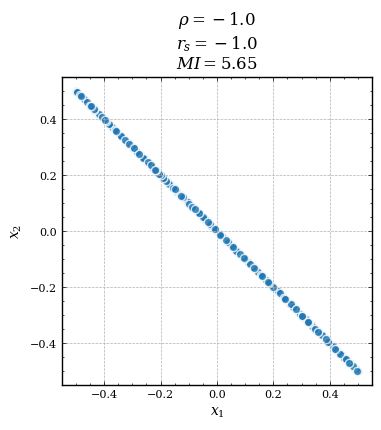

In [34]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N)-0.5
y = -np.copy(x)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x, y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x, y).correlation, 2)}$'
            "\n"
            fr'$MI={round(mutual_info_regression(x.reshape(-1, 1), y)[0], 2)}$');

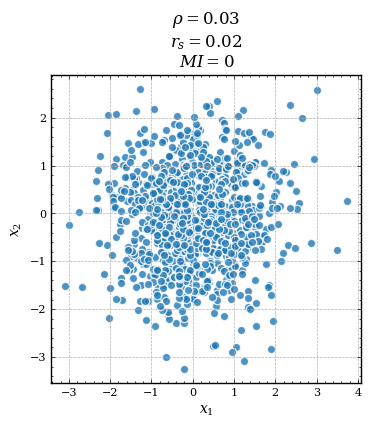

In [33]:
seed_everything(seed=7)

N=1000

ρ = 0.0
Σ = np.array([[1.0, ρ],  # correlation matrix
              [ρ, 1.0]])
X = multivariate_normal([0]*Σ.shape[0], Σ).rvs(size=N)

x = X[:,0]
y = X[:,1]

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x, y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x, y).correlation, 2)}$'
            "\n"
            fr'$MI={round(mutual_info_regression(x.reshape(-1, 1), y)[0], 2)}$');

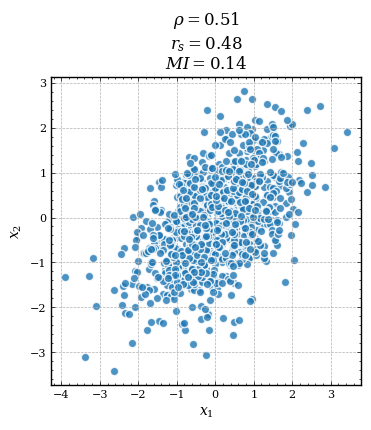

In [32]:
seed_everything(seed=7)

N=1000

ρ = 0.5
Σ = np.array([[1.0, ρ],  # correlation matrix
              [ρ, 1.0]])
X = multivariate_normal([0]*Σ.shape[0], Σ).rvs(size=N)

x = X[:,0]
y = X[:,1]

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x, y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x, y).correlation, 2)}$'
            "\n"
            fr'$MI={round(mutual_info_regression(x.reshape(-1, 1), y)[0], 2)}$');

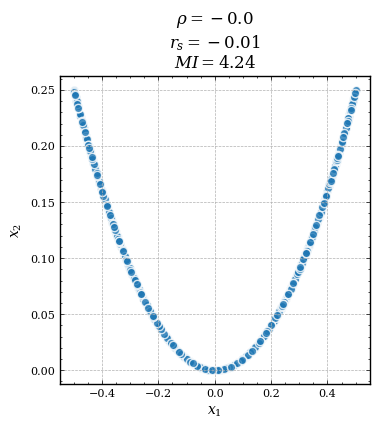

In [35]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N)-0.5
y = x**2

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x, y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x, y).correlation, 2)}$'
            "\n"
            fr'$MI={round(mutual_info_regression(x.reshape(-1, 1), y)[0], 2)}$');

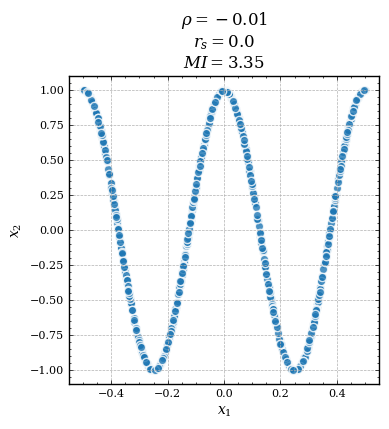

In [36]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N)-0.5
y = np.cos(4*np.pi*x)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x, y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x, y).correlation, 2)}$'
            "\n"
            fr'$MI={round(mutual_info_regression(x.reshape(-1, 1), y)[0], 2)}$');

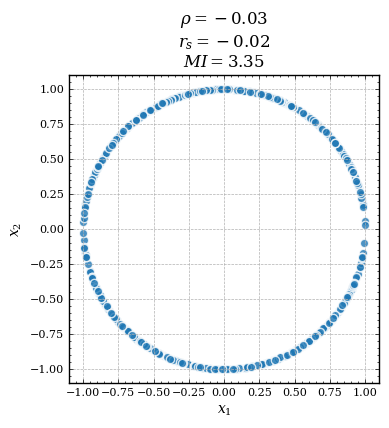

In [37]:
seed_everything(seed=7)

N=1000
x = 2*np.random.rand(N)-1
y = np.sqrt(1-x**2)
idxs = np.random.choice(N, size=N // 2, replace=False)
y[idxs] = -1*y[idxs]

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x, y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x, y).correlation, 2)}$'
            "\n"
            fr'$MI={round(mutual_info_regression(x.reshape(-1, 1), y)[0], 2)}$');

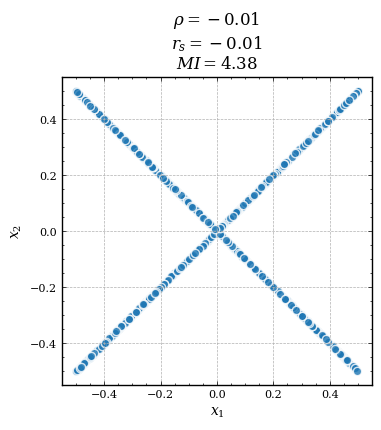

In [38]:
seed_everything(seed=7)

N=1000
x = np.random.rand(N)-0.5
y = np.copy(x)
idxs = np.random.choice(N, size=N // 2, replace=False)
y[idxs] = -1*y[idxs]

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot()
ax.scatter(x, y, alpha=0.8, edgecolors='w')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_title(fr'$\rho={round(np.corrcoef(x, y)[0,1], 2)}$'
            "\n"
            fr'$r_s={round(scipy.stats.spearmanr(x, y).correlation, 2)}$'
            "\n"
            fr'$MI={round(mutual_info_regression(x.reshape(-1, 1), y)[0], 2)}$');